### Setup

In [37]:
%pip install matplotlib
%pip install seaborn

import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.colors as mcolors

#the folder we want to save the graphics to
SAVE_PATH = "poster_visualizations/"

#pip install seaborn
# %pip install seaborn

# Read the data from the TSV file
# NOTE: READING DATA FROM COHEN KAPPA'S DATA (ck_data) RIGHT NOW
df = pd.read_csv('../ck_data/2024-08-17_bug_analysis_base.tsv', sep='\t')

# Drop rows were the Skipped? column is true
# df = df[df['Skipped?'] != True]
# Drop rows where false positives is true
df = df[df['False pos?'] != True]
# Only keep rows where either Training? or Testing? is true
df = df[(df['Training?'] == True) | (df['Testing?'] == True)]

# Drop columns
df = df.drop(columns=['Link', 'Fix Link', 'Make Benchmark?', 'Associated Benchmark', 'Rater', 'Training?', 'Testing?', 'Skipped?', 'False pos?'])

print(len(df))

df

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.
89



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


,Set 3?,Owner,Project,Title,Stars,TF-IDFs,Size,Datetime,Arrow,Pendulum,...,Affected Computation 2,Affected Computation 3,Obscurity,Impact/Severity,# LOC,Logic Needed,Comments,BPST1,BPST2,BPST3
0,False,python-poetry,tomlkit,datetime.utcnow and datetime.utcfromtimestamp ...,643.0,1.312623,1001.0,1.0,0.0,0.0,...,NaN,NaN,Low,Low,Low,Low,NaN,Outdated/Deprecated APIs,NaN,NaN
1,False,frictionlessdata,frictionless-py,SpssParser ignores timezones,683.0,1.270077,1279.0,1.0,0.0,0.0,...,String Parsing/Formatting (data),NaN,Low,Medium,Medium,High,NaN,Dropping Timezones,NaN,NaN
2,False,sdispater,pendulum,Deepcopy of Month-based Duration produces a di...,6109.0,1.191295,1014.0,1.0,0.0,1.0,...,NaN,NaN,Medium,Medium,Medium,Low,NaN,Unintuitive Arithmetic,NaN,NaN
3,False,googleapis,python-storage,`DeprecationWarning` warning in build log for ...,420.0,1.176351,10349.0,1.0,0.0,0.0,...,NaN,NaN,Low,Low,Low,Low,NaN,Outdated/Deprecated APIs,NaN,NaN
4,False,googleapis,python-logging,`DeprecationWarning` warning in build log for ...,119.0,1.167279,2673.0,1.0,0.0,0.0,...,NaN,NaN,Low,Low,Low,Low,NaN,Outdated/Deprecated APIs,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,False,apache,airflow,Task and dagrun duration y-axis is incorrect i...,35031.0,0.399004,2416.0,1.0,0.0,1.0,...,NaN,NaN,Medium,Low,Medium,Medium,NaN,Precision of Representation,NaN,NaN
308,False,dateutil,dateutil,Test failure: test_tzlocal_offset_equal[GMT-tz...,2266.0,0.390517,11087.0,1.0,0.0,0.0,...,Querying Datetime Components,NaN,High,Low,Low,Low,NaN,Typo,Comparing Timezones,NaN
334,False,apache,airflow,schedule_interval can break tree view,35031.0,0.369064,1339.0,1.0,0.0,1.0,...,Delta Arithmetic,Replacing/Rounding Datetime Components,Medium,Medium,Medium,Medium,NaN,Subtracting Dates,NaN,NaN
339,False,apache,airflow,Recent changes to timezone support broke some ...,35031.0,0.366668,13445.0,1.0,0.0,1.0,...,Library Conversions,NaN,Medium,Medium,Medium,Medium,NaN,Adding Support for New Features,NaN,NaN


In [38]:
df.columns
"""
Index(['Owner', 'Project', 'Title', 'Stars', 'TF-IDFs', 'Size', 'Datetime',
       'Arrow', 'Pendulum', 'Description', 'Category 1', 'Category 2',
       'Affected Computation 1', 'Affected Computation 2',
       'Affected Computation 3', 'Obscurity', 'Impact/Severity', '# LOC',
       'Logic Needed', 'Comments', 'BPST1', 'BPST2', 'BPST3'],
      dtype='object')
      """

"\nIndex(['Owner', 'Project', 'Title', 'Stars', 'TF-IDFs', 'Size', 'Datetime',\n       'Arrow', 'Pendulum', 'Description', 'Category 1', 'Category 2',\n       'Affected Computation 1', 'Affected Computation 2',\n       'Affected Computation 3', 'Obscurity', 'Impact/Severity', '# LOC',\n       'Logic Needed', 'Comments', 'BPST1', 'BPST2', 'BPST3'],\n      dtype='object')\n      "

### What is the most common cause of bugs?
##### Representation of Categories

Color map: ['#642915', '#c7522a', '#d68a58', '#e5c185', '#74a892', '#094d4d', '#80c2c2', '#b1e0e0']


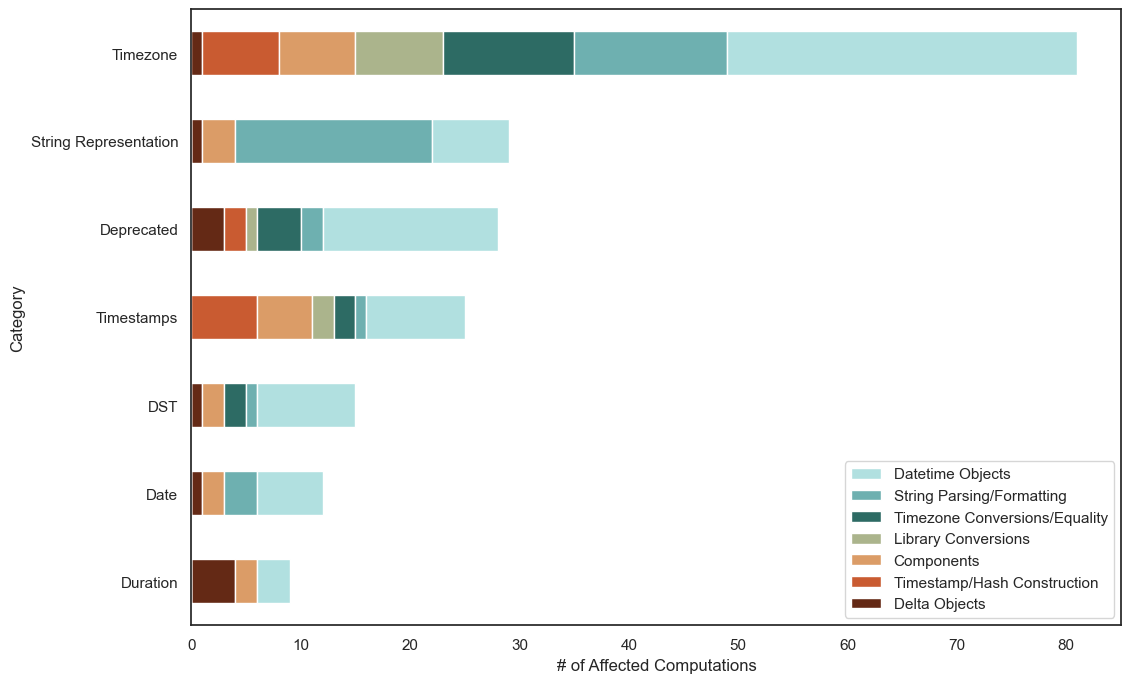

In [39]:
categories = [
    "Date",
"DST",
"Duration",
"String Representation",
"Timestamps",
"Timezone",
"Deprecated"
#    "Other" #added
]
"""
categories = [
    "Date",
"DST",
"Duration",
"String Representation",
"Timestamps",
"Timezone",
"Deprecated",
"Other",
"Fold",
"Leap year",
"NTP/Leap Seconds"
]
"""


affected_comp = [
    "Timestamp/Hash Construction",
"Datetime Objects",
"Delta Objects",
"Components",
"String Parsing/Formatting",
"Timezone Conversions/Equality",
"Library Conversions",
#    "Other" #added
]

"""
affected_comp = ["Timestamp/Hash Construction",
"Datetime Arithmetic",
"Datetime Comparison",
"Datetime Construction",
"Datetime Equality",
"Delta Arithmetic",
"Delta Comparison",
"Delta Construction",
"Delta Conversion",
"Delta Equality",
"Querying Datetime Components",
"Replacing/Rounding Datetime Components",
"String Parsing/Formatting (humanized)",
"String Parsing/Formatting (data)",
"Timezone Conversions",
"Timezone Equality",
"Library Conversions"]
"""
#bpst = ac
#bpsts = affected_comp
#bpstmap = acmap
#rowbpst = rowac

acmap = {"Category": categories, "total": [0]*len(categories)}
for ac in affected_comp:
    acmap[ac] = [0]*len(categories)

for index,row in df.iterrows():
    cats = [row['Category 1'], row['Category 2']]
    indecies = []
    for c in cats:
      if type(c) is str:
        if c not in categories:
          c = "Other"
        indecies.append(categories.index(c))
    rowac = [row['Affected Computation 1'], row['Affected Computation 2'], row['Affected Computation 3']]
    for ac in rowac:
        if type(ac) is str:
            if ac=="Datetime Arithmetic" or ac=="Datetime Comparison" or ac=="Datetime Construction" or ac=="Datetime Equality":
              ac = "Datetime Objects"
            elif ac=="Delta Arithmetic" or ac=="Delta Comparison" or ac=="Delta Construction" or ac=="Delta Equality":
              ac = "Delta Objects"
            elif ac=="Querying Datetime Components" or ac=="Replacing/Rounding Datetime Components":
              ac = "Components"
            elif ac=="String Parsing/Formatting (humanized)" or ac=="String Parsing/Formatting (data)":
              ac = "String Parsing/Formatting"
            elif ac=="Timezone Conversions" or ac=="Timezone Equality":
              ac = "Timezone Conversions/Equality"
            #else:
            #  ac = "Other"
            #mapping stuff
            """
            "Timestamp/Hash Construction"
            "Datetime" = Datetime Arithmetic, Datetime Comparison, Datetime Construction, Datetime Equality
            "Delta" = Delta Arithmetic, Delta Comparison, Delta Construction, Delta Equality
            "Components" = Querying Datetime Components, Replacing/Rounding Datetime Components
            "String Parsing/Formatting" = String Parsing/Formatting (humanized), String Parsing/Formatting (data)
            "Timezone Conversions/Equality" = Timezone Conversions, Timezone Equality
            "Library Conversions" = Library Conversions
            "Other"
            """
            for i in indecies:
                acmap[ac][i] += 1
                acmap["total"][i] += 1

sns.set(style='white')

# colors = ['Pastel1', 'Pastel2', 'Paired', 'Accent', 'Dark2','Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b','tab20c']
# colors = "Set2"
# colors = "Dark2"
#colors = "tab20b"
#colors = ["#003f5c", "#58508d", "#8a508f", "#a9ff95", "#88f5ff", "#98bfff", "#a294ff", "#ffadff"]
#colors = ["#003f5c",  "#58508d",  "#8a508f",  "#bc5090",  "#de5a79",  "#ff6361",  "#ff8531", "#ffa600"]

# colors = ["#ffb610", "#a05195", "#ff7c43", "#9681c1", "#f95d6a", "#2f4b7c", "#d45087"] #funk retro, adjusted for 7
# colors = ["#F94144", "#F3722C", "#F8961E", "#F9C74F", "#90BE6D", "#43AA8B", "#277DA1"] #arcade vibes, adjusted for 7
colors = ["#642915", "#c7522a", "#d68a58", "#e5c185", "#74a892", "#094d4d", "#80c2c2", "#b1e0e0"]

print("Color map:", colors)


temp_df = pd.DataFrame(acmap).set_index('Category')
temp_df = temp_df.sort_values("total").sort_values("Timezone", axis=1).drop(columns="total")
custom_cmap = mcolors.LinearSegmentedColormap.from_list("", colors)
ax = temp_df.plot( kind='barh', legend='reverse', colormap=custom_cmap, stacked=True, figsize=(12, 8))
#ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha='right')
ax.set_xlabel("# of Affected Computations")

plt.savefig(SAVE_PATH+'fig1.png', transparent=True)

### What are the characteristics of each category?
##### Measure of obscurity and impact/severity for each category

{'Datetime Construction': {'Low Obscurity': 29, 'Medium Obscurity': 19, 'High Obscurity': 3, 'Low Impact/Severity': 17, 'Medium Impact/Severity': 31, 'High Impact/Severity': 3}, 'Delta Construction': {'Low Obscurity': 3, 'Medium Obscurity': 1, 'High Obscurity': 0, 'Low Impact/Severity': 2, 'Medium Impact/Severity': 2, 'High Impact/Severity': 0}, 'Datetime Comparison': {'Low Obscurity': 2, 'Medium Obscurity': 0, 'High Obscurity': 0, 'Low Impact/Severity': 1, 'Medium Impact/Severity': 1, 'High Impact/Severity': 0}, 'Library Conversions': {'Low Obscurity': 6, 'Medium Obscurity': 3, 'High Obscurity': 0, 'Low Impact/Severity': 1, 'Medium Impact/Severity': 7, 'High Impact/Severity': 1}, 'String Parsing/Formatting (data)': {'Low Obscurity': 10, 'Medium Obscurity': 10, 'High Obscurity': 1, 'Low Impact/Severity': 1, 'Medium Impact/Severity': 19, 'High Impact/Severity': 1}, 'Datetime Arithmetic': {'Low Obscurity': 4, 'Medium Obscurity': 4, 'High Obscurity': 1, 'Low Impact/Severity': 4, 'Medium I

C:\Users\chens\AppData\Local\Temp\ipykernel_33372\156782526.py:80: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(percentages, ha='right')


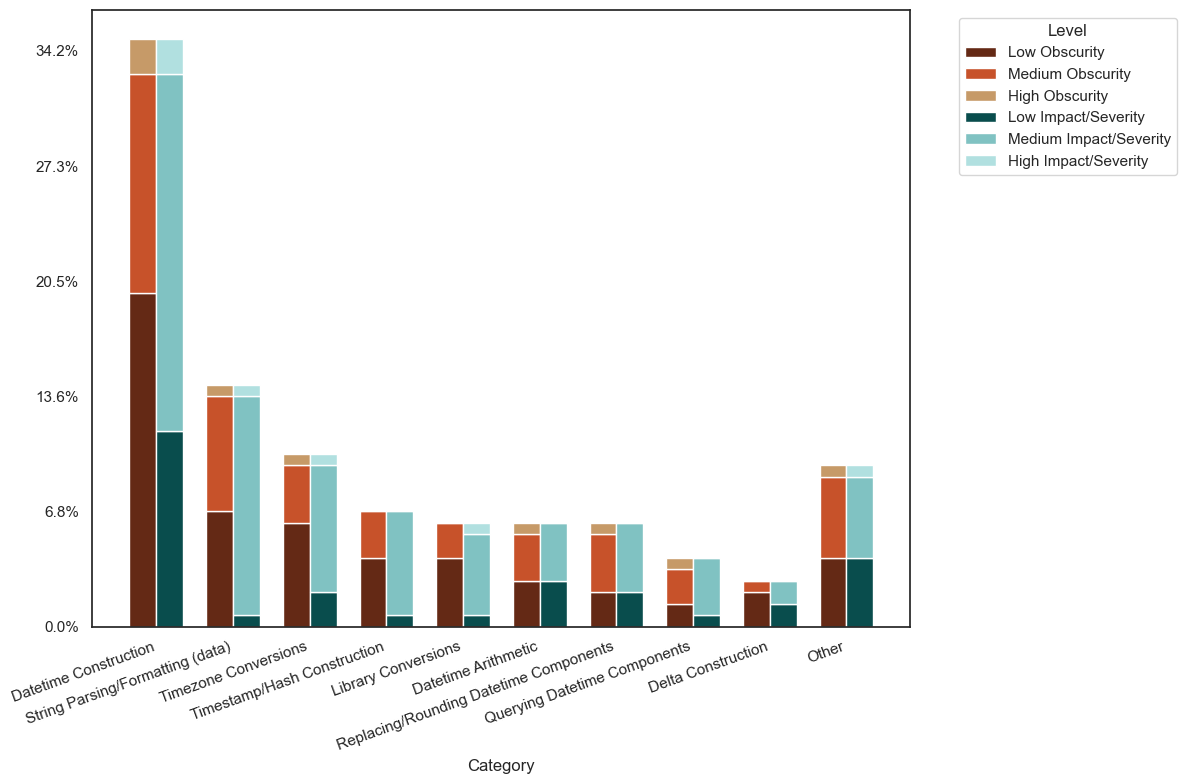

In [40]:
# Assuming df is your DataFrame and already loaded with data

# Initialize an empty dictionary to store results
results = {}

# Combine unique categories from both columns
categories = pd.concat([df['Affected Computation 1'], df['Affected Computation 2'], df['Affected Computation 3']], axis=0).unique()

# Loop through each unique category
for category in categories:
    # Filter the DataFrame for the current category
    df_category = df[(df['Affected Computation 1'] == category) | (df['Affected Computation 2'] == category) | (df['Affected Computation 3'] == category)]

    # Count the occurrences of each obscurity level
    counts_o = df_category['Obscurity'].value_counts().to_dict()
    counts_s = df_category['Impact/Severity'].value_counts().to_dict()

    # Ensure all levels are included in the result
    results[category] = {
        'Low Obscurity': counts_o.get('Low', 0),
        'Medium Obscurity': counts_o.get('Medium', 0),
        'High Obscurity': counts_o.get('High', 0),
        'Low Impact/Severity': counts_s.get('Low', 0),
        'Medium Impact/Severity': counts_s.get('Medium', 0),
        'High Impact/Severity': counts_s.get('High', 0)
    }

print(results)

# Convert the results dictionary to a DataFrame for better visualization
results_df = pd.DataFrame(results).T
# Convert the results dictionary to a DataFrame for better visualization
results_df = pd.DataFrame(results).T

# Calculate the size of each category
results_df['Total'] = results_df.sum(axis=1)

# Select the top 5 categories by size
top_categories = results_df.nlargest(9, 'Total')

# Select the remaining categories for "Other"
other_categories = results_df.drop(top_categories.index)

# Sum the counts for the "Other" category
other_sums = other_categories.sum()
other_sums.name = 'Other'

# Append the "Other" category to the top categories
top_categories = pd.concat([top_categories, other_sums.to_frame().T])


# Create a grouped bar chart for the top 5 categories + "Other"
categories = top_categories.index
percentages = [f"{float(int(342 * i / 5))/10}%" for i in range(100)]
obscurity_counts = top_categories[['Low Obscurity', 'Medium Obscurity', 'High Obscurity']]
severity_counts = top_categories[['Low Impact/Severity', 'Medium Impact/Severity', 'High Impact/Severity']]

x = pd.Index(range(len(categories)))  # the label locations
width = 0.35  # the width of the bars

# colors = ['#FBFBF2', '#E5E6E4', '#CFD2CD', '#A6A2A2', '#847577', '#615758']
#colors = ['#10A0EC', '#7CC6FE', '#ACD5FF', '#E7BBE3', '#C884A6', '#B25282']
colors = ["#642915", "#c7522a", "#c69a68", "#094d4d", "#80c2c2", "#b1e0e0"]

fig, ax = plt.subplots(figsize=(12, 8))
rects1 = ax.bar(x - width/2, obscurity_counts['Low Obscurity'], width, label='Low Obscurity', color=colors[0])
rects2 = ax.bar(x - width/2, obscurity_counts['Medium Obscurity'], width, bottom=obscurity_counts['Low Obscurity'], label='Medium Obscurity', color=colors[1])
rects3 = ax.bar(x - width/2, obscurity_counts['High Obscurity'], width, bottom=obscurity_counts['Low Obscurity'] + obscurity_counts['Medium Obscurity'], label='High Obscurity', color=colors[2])

rects4 = ax.bar(x + width/2, severity_counts['Low Impact/Severity'], width, label='Low Impact/Severity', color=colors[3])
rects5 = ax.bar(x + width/2, severity_counts['Medium Impact/Severity'], width, bottom=severity_counts['Low Impact/Severity'], label='Medium Impact/Severity', color=colors[4])
rects6 = ax.bar(x + width/2, severity_counts['High Impact/Severity'], width, bottom=severity_counts['Low Impact/Severity'] + severity_counts['Medium Impact/Severity'], label='High Impact/Severity', color=colors[5])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Category')
ax.set_ylabel('')
#ax.set_title('Categories vs Impact/Severity and Obscurity')
ax.set_xticks(x)
ax.set_xticklabels(categories, rotation=20, ha='right')
ax.set_yticklabels(percentages, ha='right')
ax.legend(title='Level', bbox_to_anchor=(1.05, 1), loc='upper left')

fig.tight_layout()

plt.show()

fig.savefig(SAVE_PATH+'fig3.png', transparent=True)

### What are the BPSTs associated with each category?
##### Proportion of BPSTs for each category

Color map: ['#642915', '#c7522a', '#d68a58', '#e5c185', '#74a892', '#094d4d', '#80c2c2', '#b1e0e0']


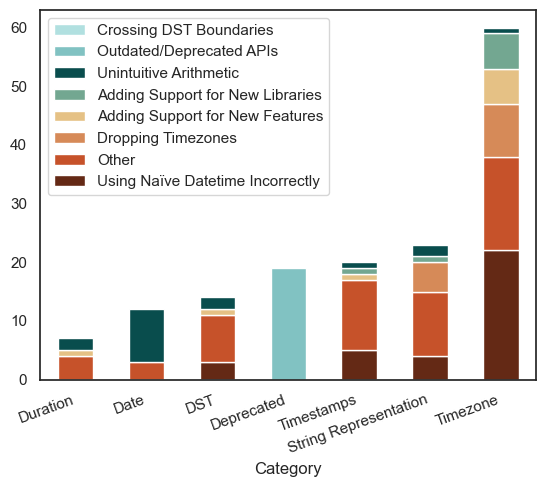

In [41]:
categories = """Date
DST
Duration
String Representation
Timestamps
Timezone
Deprecated""".split("\n")

bpsts_short = """Outdated/Deprecated APIs
Using Naïve Datetime Incorrectly
Dropping Timezones
Adding Support for New Features
Unintuitive Arithmetic
Adding Support for New Features
Adding Support for New Libraries
Crossing DST Boundaries
Other""".split("\n")
# only categories listed >=8 times

bpsts = """Incorrect API usage
Outdated/Deprecated APIs
Calling datetime.now() Multiple Times
Using Naïve Datetime Incorrectly
Dropping Timezones
Typo
Subtracting Dates
Adding Support for New Libraries
Adding Support for New Features
Precision of Representation
Library Bug
OOB Timestamps
OOB Datetimes
Creating time in unspecified fold
Crossing DST boundaries
Comparing Timezones
Unintuitive Arithmetic
TODO
Other""".split("\n")

# Figure 2a - Chart bug patterns across each category

bpstmap = {"Category": categories, "total": [0]*len(categories)}
for bpst in bpsts_short:
    bpstmap[bpst] = [0]*len(categories)

for index,row in df.iterrows():
    cats = [row['Category 1'], row['Category 2']]
    indecies = []
    for c in cats:
        if type(c) is str:
            indecies.append(categories.index(c))
    rowbpsts = [row['BPST1'], row['BPST2'], row['BPST3']]
    for bpst in rowbpsts:
        if type(bpst) is str:
            if bpst not in bpsts_short:
                bpst = "Other"
            for i in indecies:
                bpstmap[bpst][i] += 1
                bpstmap["total"][i] += 1

sns.set(style='white')

# colors = ['Pastel1', 'Pastel2', 'Paired', 'Accent', 'Dark2','Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b','tab20c']
# colors = "Set2"
# colors = "Dark2"
#colors = "tab20b"
colors = ["#642915", "#c7522a", "#d68a58", "#e5c185", "#74a892", "#094d4d", "#80c2c2", "#b1e0e0"]
print("Color map:", colors)

temp_df = pd.DataFrame(bpstmap).set_index('Category')
temp_df = temp_df.sort_values("total").sort_values("Timezone", ascending=False, axis=1).drop(columns="total")
custom_cmap = mcolors.LinearSegmentedColormap.from_list("", colors)
ax = temp_df.plot(kind='bar', legend='reverse', colormap=custom_cmap, stacked=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=20,ha='right')

plt.savefig(SAVE_PATH+'fig2.png', transparent=True)

### What are the average impact/severity for each BPST?
##### Number of issues with each BPST, and the proportions of them that have low medium or high impact/severity

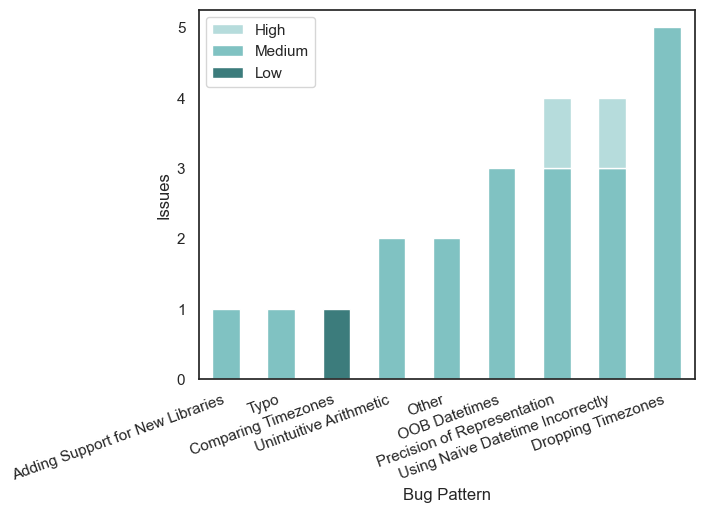

<Figure size 640x480 with 0 Axes>

In [42]:
# Figure 2b - Chart severity across bpst for string rep

df_sr = df[(df['Category 1'] == 'String Representation') | (df['Category 2'] == 'String Representation')]


ratings = ["Low", "Medium", "High"]
temp_data = {"Bug Pattern": bpsts, "total": [0]*len(bpsts)}
for r in ratings:
    temp_data[r] = [0]*len(bpsts)

for index, row in df_sr.iterrows():
    rowbpsts = [row['BPST1'], row['BPST2'], row['BPST3']]
    for bpst in rowbpsts:
        if type(bpst) is str:
            bpst = bpst if bpst in bpsts else "Other"
            val = row["Impact/Severity"]
            temp_data[val][bpsts.index(bpst)] += 1
            temp_data["total"][bpsts.index(bpst)] += 1


temp_df = pd.DataFrame(temp_data).set_index('Bug Pattern')
temp_df = temp_df.loc[temp_df['total'] !=0]
temp_df = temp_df.sort_values("total").drop(columns="total")
#temp_df = temp_df.drop("TODO")

#colors = ['#0a00b3', '#346bcc', '#00a9ec']
# colors = ["#642915", "#c7522a", "#d68a58", "#e5c185", "#74a892", "#094d4d", "#80c2c2", "#b1e0e0"]
# custom_cmap = mcolors.LinearSegmentedColormap.from_list("", colors[1:4])
colors = ["#3C7C7C", "#80c2c2", "#B6DCDC"]
custom_cmap = mcolors.LinearSegmentedColormap.from_list("", colors)

ax = temp_df.plot(kind='bar', legend='reverse', colormap=custom_cmap, stacked=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=20,ha='right')
ax.set_ylabel("Issues")

# rects = ax.patches
# print(rects)

# Make some labels.
# labels = [f"label{i}" for i in range(len(rects))]

# for rect, label in zip(rects, labels):
#     height = rect.get_height()
#     ax.text(
#         rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom"
#     )

plt.show()

plt.savefig(SAVE_PATH+'fig2-1.png', transparent=True)

### What is the distribution of logic and impact/severity levels for datetime construction (affected computation) issues?

##### Logic levels and impact/severity levels for datetime construction issues in affected computations

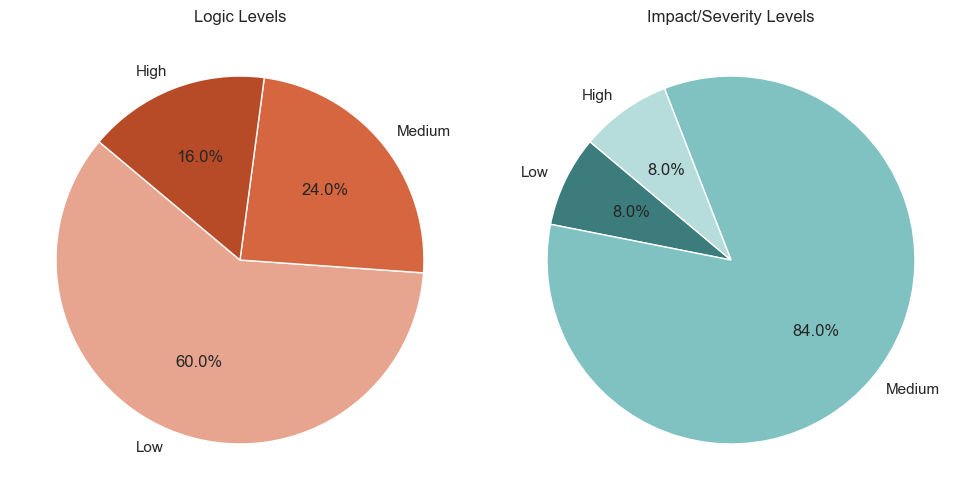

In [43]:
#Datetime Construction
df = df.reset_index(drop=True)

df_TZ = df[(df['Category 1'] == "Timezone") | (df['Category 2'] == "Timezone")]

# print(df_TZ['Affected Computation 1'])

df_TZ_cn = df_TZ[(df_TZ['Affected Computation 1'] == "Datetime Construction") | (df_TZ['Affected Computation 2'] == "Datetime Construction") | (df_TZ['Affected Computation 3'] == "Datetime Construction")]
# df_TZ_cn

logic_data = {}
impact_data = {}

logic_data['Low'] = df_TZ_cn['Logic Needed'].value_counts().get('Low', 0)
logic_data['Medium'] = df_TZ_cn['Logic Needed'].value_counts().get('Medium', 0)
logic_data['High'] = df_TZ_cn['Logic Needed'].value_counts().get('High', 0)


impact_data['Low'] = df_TZ_cn['Impact/Severity'].value_counts().get('Low', 0)
impact_data['Medium'] = df_TZ_cn['Impact/Severity'].value_counts().get('Medium', 0)
impact_data['High'] = df_TZ_cn['Impact/Severity'].value_counts().get('High', 0)

#colors = ['#10A0EC', '#7CC6FE', '#ACD5FF', '#E7BBE3', '#C884A6', '#B25282']
colors = ["#E7A590", "#D66640", "#B84B27", "#3C7C7C", "#80c2c2", "#B6DCDC"]

# Create pie chart for logic levels
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.pie(logic_data.values(), labels=logic_data.keys(), autopct='%1.1f%%', startangle=140, colors=colors[0:3])
plt.title('Logic Levels')

# Create pie chart for impact/severity levels
plt.subplot(1, 2, 2)
plt.pie(impact_data.values(), labels=impact_data.keys(), autopct='%1.1f%%', startangle=140, colors=colors[3:6])
plt.title('Impact/Severity Levels')

plt.tight_layout()
plt.savefig(SAVE_PATH+'fig1-1_datetime.png', transparent=True)
plt.show()



### What is the distribution of logic and impact/severity levels for issues in deprecated affected computations?

##### Logic levels and impact/severity levels for deprecated issues in affected computations

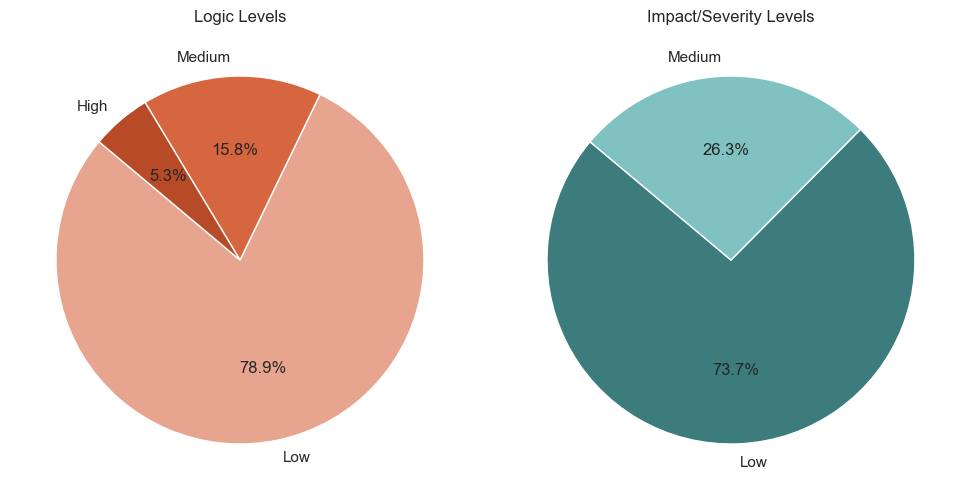

In [44]:
#Deprecated
df = df.reset_index(drop=True)

df_D = df[(df['Category 1'] == "Deprecated") | (df['Category 2'] == "Deprecated")]

logic_data = {}
impact_data = {}

logic_data['Low'] = df_D['Logic Needed'].value_counts().get('Low', 0)
logic_data['Medium'] = df_D['Logic Needed'].value_counts().get('Medium', 0)
logic_data['High'] = df_D['Logic Needed'].value_counts().get('High', 0)


impact_data['Low'] = df_D['Impact/Severity'].value_counts().get('Low', 0)
impact_data['Medium'] = df_D['Impact/Severity'].value_counts().get('Medium', 0)
# impact_data['High'] = df_D['Impact/Severity'].value_counts().get('High', 0)

#colors = ['#10A0EC', '#7CC6FE', '#ACD5FF', '#E7BBE3', '#C884A6', '#B25282']
colors = ["#E7A590", "#D66640", "#B84B27", "#3C7C7C", "#80c2c2", "#B6DCDC"]

# Create pie chart for logic levels
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.pie(logic_data.values(), labels=logic_data.keys(), autopct='%1.1f%%', startangle=140, colors=colors[0:3])
plt.title('Logic Levels')

# Create pie chart for impact/severity levels
plt.subplot(1, 2, 2)
plt.pie(impact_data.values(), labels=impact_data.keys(), autopct='%1.1f%%', startangle=140, colors=colors[3:6])
plt.title('Impact/Severity Levels')

plt.tight_layout()
plt.savefig(SAVE_PATH+'fig1-2_deprecated.png', transparent=True)
plt.show()



### What is the distribution of logic and impact/severity levels for issues in the category String Representation?

##### Logic levels and impact/severity levels for String Representation category issues

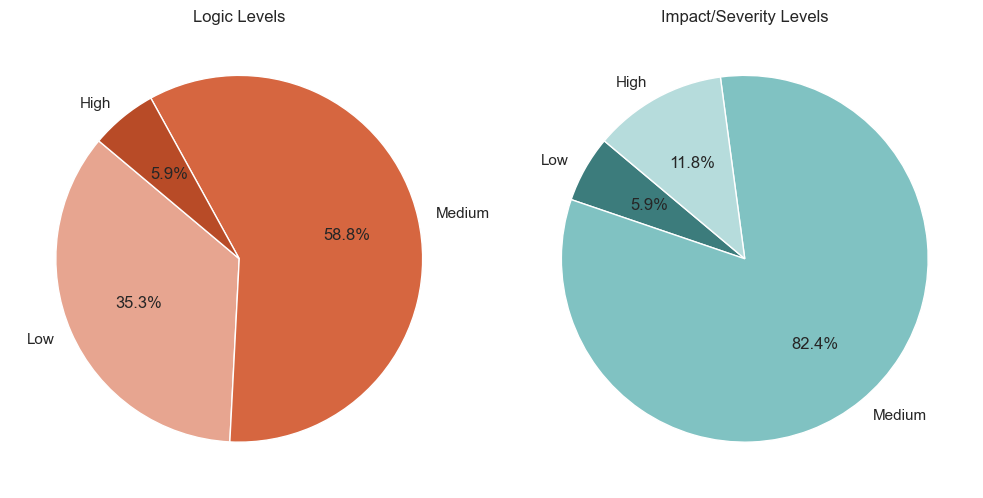

In [45]:
#String Representation
df = df.reset_index(drop=True)

df_SR = df[(df['Category 1'] == "String Representation") | (df['Category 2'] == "String Representation")]

logic_data = {}
impact_data = {}

logic_data['Low'] = df_SR['Logic Needed'].value_counts().get('Low', 0)
logic_data['Medium'] = df_SR['Logic Needed'].value_counts().get('Medium', 0)
logic_data['High'] = df_SR['Logic Needed'].value_counts().get('High', 0)


impact_data['Low'] = df_SR['Impact/Severity'].value_counts().get('Low', 0)
impact_data['Medium'] = df_SR['Impact/Severity'].value_counts().get('Medium', 0)
impact_data['High'] = df_SR['Impact/Severity'].value_counts().get('High', 0)

#colors = ['#10A0EC', '#7CC6FE', '#ACD5FF', '#E7BBE3', '#C884A6', '#B25282']
colors = ["#E7A590", "#D66640", "#B84B27", "#3C7C7C", "#80c2c2", "#B6DCDC"]

# Create pie chart for logic levels
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.pie(logic_data.values(), labels=logic_data.keys(), autopct='%1.1f%%', startangle=140, colors=colors[0:3])
plt.title('Logic Levels')

# Create pie chart for impact/severity levels
plt.subplot(1, 2, 2)
plt.pie(impact_data.values(), labels=impact_data.keys(), autopct='%1.1f%%', startangle=140, colors=colors[3:6])
plt.title('Impact/Severity Levels')

plt.tight_layout()
plt.savefig(SAVE_PATH+'fig1-3_stringrep.png', transparent=True)
plt.show()


### How is each characteristic correlated?
##### Correlation graph for impact, obscurity, LOC, and logic needed

    Obscurity  Impact/Severity  # LOC  Logic Needed
0           1                1      1             1
1           1                2      2             3
2           2                2      2             1
3           1                1      1             1
4           1                1      1             1
..        ...              ...    ...           ...
84          2                1      2             2
85          3                1      1             1
86          2                2      2             2
87          2                2      2             2
88          1                2      2             1

[89 rows x 4 columns]
                 Obscurity  Impact/Severity     # LOC  Logic Needed
Obscurity         1.000000         0.004699  0.210291      0.263132
Impact/Severity   0.004699         1.000000  0.136019      0.182842
# LOC             0.210291         0.136019  1.000000      0.634859
Logic Needed      0.263132         0.182842  0.634859      1.000000


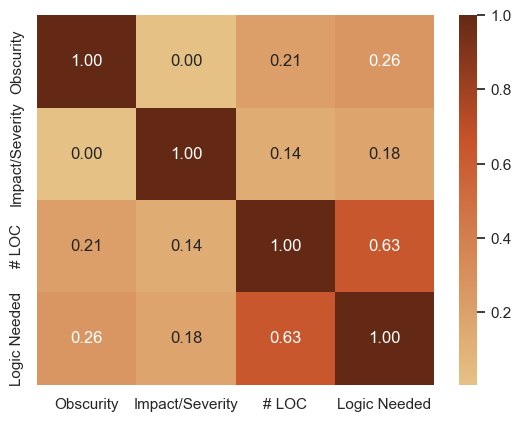

In [46]:
# Convert low, medium, high to 1, 2, 3 for 'Obscurity', 'Impact/Severity', '# LOC', and 'Logic Needed'
df_temp = df.copy()
df_temp['Impact/Severity'] = df['Impact/Severity'].map({'Low': 1, 'Medium': 2, 'High': 3})
df_temp['Obscurity'] = df['Obscurity'].map({'Low': 1, 'Medium': 2, 'High': 3})
df_temp['# LOC'] = df['# LOC'].map({'Low': 1, 'Medium': 2, 'High': 3, 'Very High': 4})
df_temp['Logic Needed'] = df['Logic Needed'].map({'Low': 1, 'Medium': 2, 'High': 3})
df_temp.describe()
df_temp = df_temp[['Obscurity', 'Impact/Severity', '# LOC', 'Logic Needed']]
df_temp = df_temp.fillna(0)  # You can choose another method to fill missing values
df_temp = df_temp.reset_index(drop=True)
print(df_temp)
print(df_temp.corr())
colors = ["#642915", "#c7522a", "#d68a58", "#e5c185", "#74a892", "#094d4d", "#80c2c2", "#b1e0e0"]
custom_cmap = mcolors.LinearSegmentedColormap.from_list("", colors[3::-1])
sns.heatmap(df_temp.corr(), annot=True, annot_kws={"size": 12}, cmap=custom_cmap, fmt=".2f")


plt.savefig(SAVE_PATH+'fig4.png', transparent=True)

plt.show()